In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [31]:
df=pd.read_csv("averages_enrol.csv")
df[["term"]]=pd.Categorical(df.term)
df[["section"]]=pd.Categorical(df.term)
df.head()

term          ccode section      instructor       org  expl_lvl   q_treat  \
0  1131  ['ACTSC 231']    1131     Anne Mackay  1.600000  2.873239  1.536232   
1  1131  ['ACTSC 231']    1131  Carole Bernard  1.727273  2.909091  2.090909   
2  1131  ['ACTSC 232']    1131    James Adcock  1.360825  2.804124  1.453608   
3  1131  ['ACTSC 331']    1131       Rocky Cui  1.851064  2.744681  2.043478   
4  1131  ['ACTSC 371']    1131  Brent Matheson  2.221053  2.821053  2.000000   

     visual      oral      help  ...    attend    assign     notes  textbook  \
0  1.591549  1.676056  1.526316  ...  1.225352  1.588235  1.358209  2.036364   
1  1.700000  2.000000  1.444444  ...  1.000000  1.300000  1.625000  1.333333   
2  1.567010  1.268041  2.000000  ...  1.154639  1.604167  1.516129  1.865169   
3  1.978723  2.108696  1.515152  ...  1.297872  1.500000  1.586207  1.878049   
4  2.452632  2.242105  2.565217  ...  1.329787  1.741935  1.909091  2.271429   

    new_mat  assign_amt   outside  num_resp  enrolled  resp_rate  
0  2.782609    2.901639  2.279412        71       184   0.385870  
1  2.545455    2.818182  2.000000        11        18   0.611111  
2  2.659794    2.927835  2.000000        97       143   0.678322  
3  2.659574    2.755556  2.021277        47        95   0.494737  
4  2.851064    3.021277  1.903226        95       236   0.402542  

[5 rows x 22 columns]

In [33]:
df1=df[df.num_resp>10] # only surveys with >10 responses
df1=df1.groupby("instructor").filter(lambda x:len(x)>2) # only teachers with >=3 classes
df1=pd.merge(df1,sal,how='left', left_on=["instructor"],right_on=['name']).drop(['benefits','section'],axis=1)
df1["title"].fillna(value="Lecturer",inplace=True)
df1

term                               ccode         instructor       org  \
0     1131                       ['ACTSC 232']       James Adcock  1.360825   
1     1131                       ['ACTSC 371']     Brent Matheson  2.221053   
2     1131                       ['ACTSC 372']         Peter Wood  1.435644   
3     1131          ['ACTSC 433', 'ACTSC 833']            Jun Cai  1.723077   
4     1131          ['ACTSC 446', 'ACTSC 846']         Ruodo Wang  2.308411   
...    ...                                 ...                ...       ...   
3115  1185                        ['STAT 372']  Matthias Schonlau  2.064516   
3116  1185            ['STAT 430', 'STAT 830']   Fernando Camacho  3.081081   
3117  1185                        ['STAT 431']        Leilei Zeng  2.135135   
3118  1185  ['CM 761', 'STAT 440', 'STAT 840']        Ryan Browne  2.200000   
3119  1185                        ['STAT 443']         Hamy Fahmy  3.088235   

      expl_lvl   q_treat    visual      oral      help  interest  ...  \
0     2.804124  1.453608  1.567010  1.268041  2.000000  1.641304  ...   
1     2.821053  2.000000  2.452632  2.242105  2.565217  2.070588  ...   
2     2.623762  1.400000  1.574257  1.386139  1.712121  1.590000  ...   
3     2.859375  2.262295  1.923077  2.476923  2.352941  1.833333  ...   
4     2.557692  1.990566  2.644860  2.679245  2.000000  2.031250  ...   
...        ...       ...       ...       ...       ...       ...  ...   
3115  3.101695  1.629032  2.290323  2.131148  1.744681  2.157895  ...   
3116  2.937500  2.441176  3.351351  3.055556  2.400000  2.428571  ...   
3117  2.729730  2.000000  1.945946  2.162162  1.733333  1.861111  ...   
3118  2.933333  2.066667  2.357143  2.266667  1.500000  1.733333  ...   
3119  3.000000  3.090909  3.323529  2.941176  3.076923  2.312500  ...   

         notes  textbook   new_mat  assign_amt   outside  num_resp  enrolled  \
0     1.516129  1.865169  2.659794    2.927835  2.000000        97       143   
1     1.909091  2.271429  2.851064    3.021277  1.903226        95       236   
2     1.785714  2.103896  2.762376    2.891089  1.930000       101       174   
3     1.578947  2.166667  2.907692    2.707692  1.968750        65       107   
4     1.819444  2.370968  2.538462    2.844660  2.038095       107       178   
...        ...       ...       ...         ...       ...       ...       ...   
3115  1.862745  1.962963  2.844828    3.100000  1.919355        62       160   
3116  2.000000  1.666667  2.363636    3.171429  2.270270        37       105   
3117  1.821429  1.950000  2.888889    2.756757  2.540541        37       117   
3118  1.636364  1.000000  2.733333    2.666667  3.066667        15        40   
3119  2.055556  2.000000  2.424242    2.558824  2.647059        34       128   

      resp_rate                title     salary  
0      0.678322             Lecturer  136295.28  
1      0.402542             Lecturer  128478.60  
2      0.580460             Lecturer  162561.88  
3      0.607477            Professor  161277.18  
4      0.601124  Associate Professor  141182.60  
...         ...                  ...        ...  
3115   0.387500            Professor  175737.96  
3116   0.352381             Lecturer        NaN  
3117   0.316239  Associate Professor  154329.68  
3118   0.375000  Assistant Professor  126343.24  
3119   0.265625             Lecturer  113016.60  

[3120 rows x 23 columns]

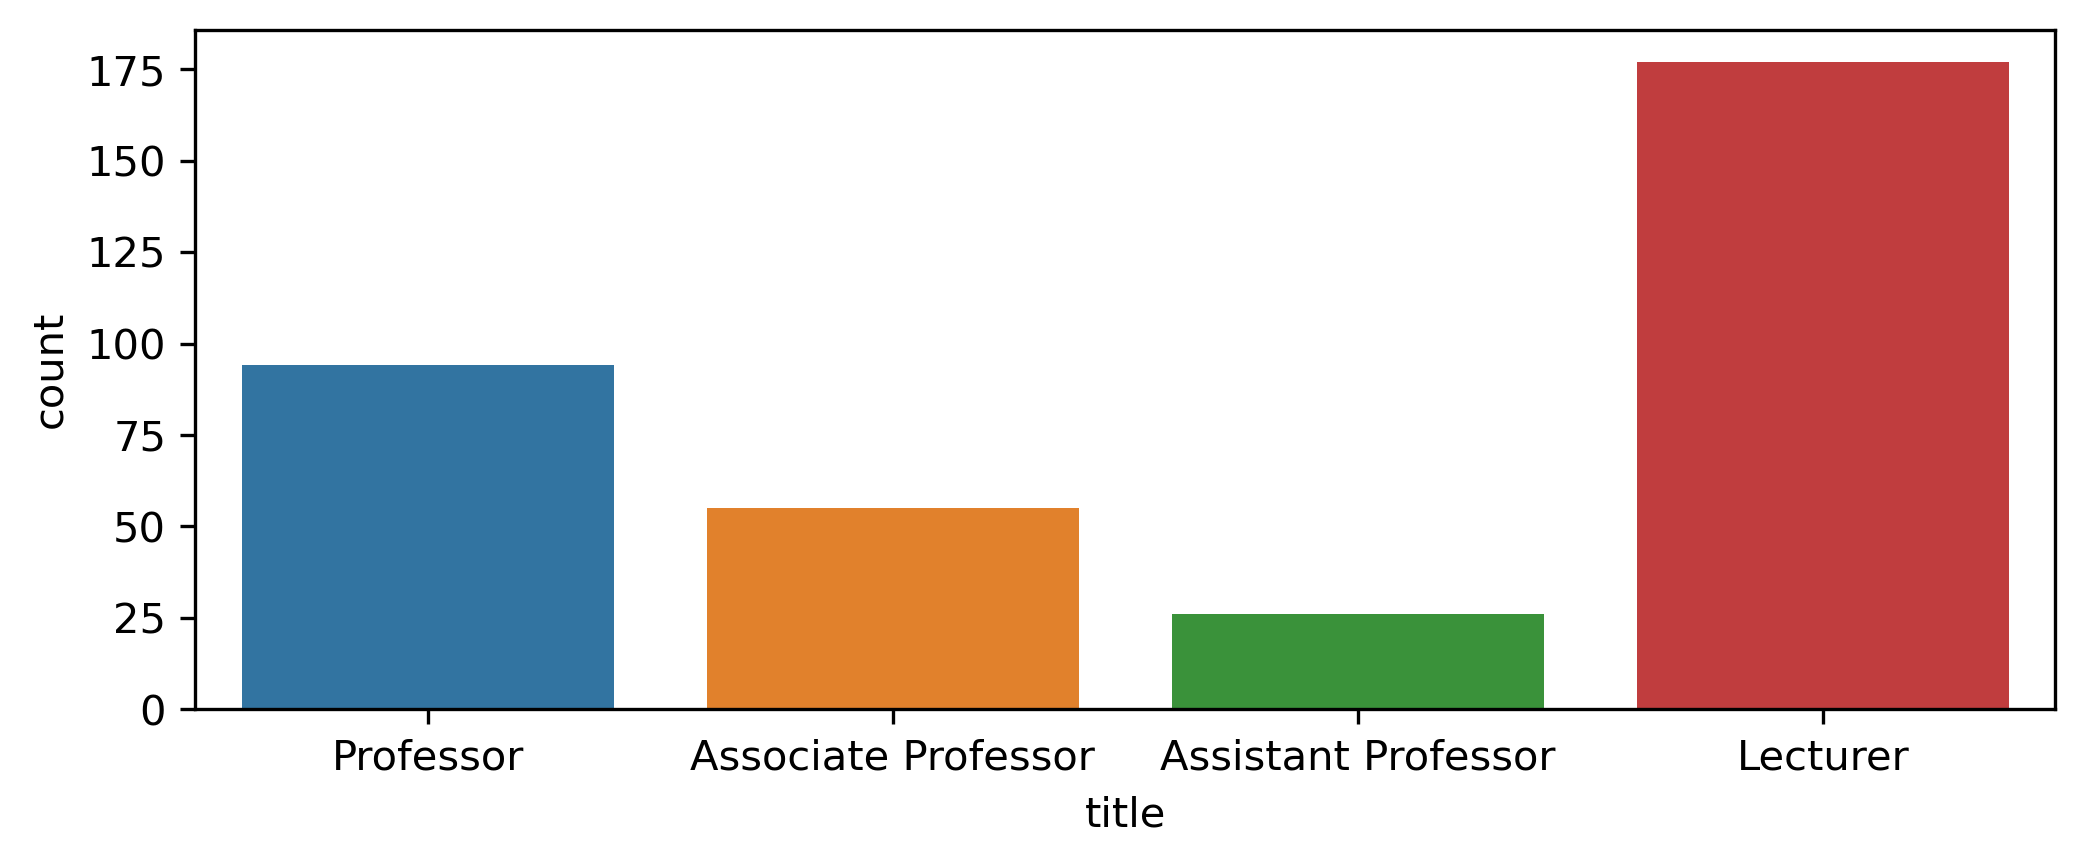

In [39]:
plt.figure(figsize=(8, 3))
sns.countplot(x="title", data=df1.groupby("instructor").first(),order=["Professor","Associate Professor","Assistant Professor","Lecturer"])#hue=df1.term)#df1.term.apply(lambda x:(x%10)//4))

In [38]:
df1.columns

Index(['term', 'ccode', 'instructor', 'org', 'expl_lvl', 'q_treat', 'visual',
       'oral', 'help', 'interest', 'overall', 'attend', 'assign', 'notes',
       'textbook', 'new_mat', 'assign_amt', 'outside', 'num_resp', 'enrolled',
       'resp_rate', 'title', 'salary'],
      dtype='object')

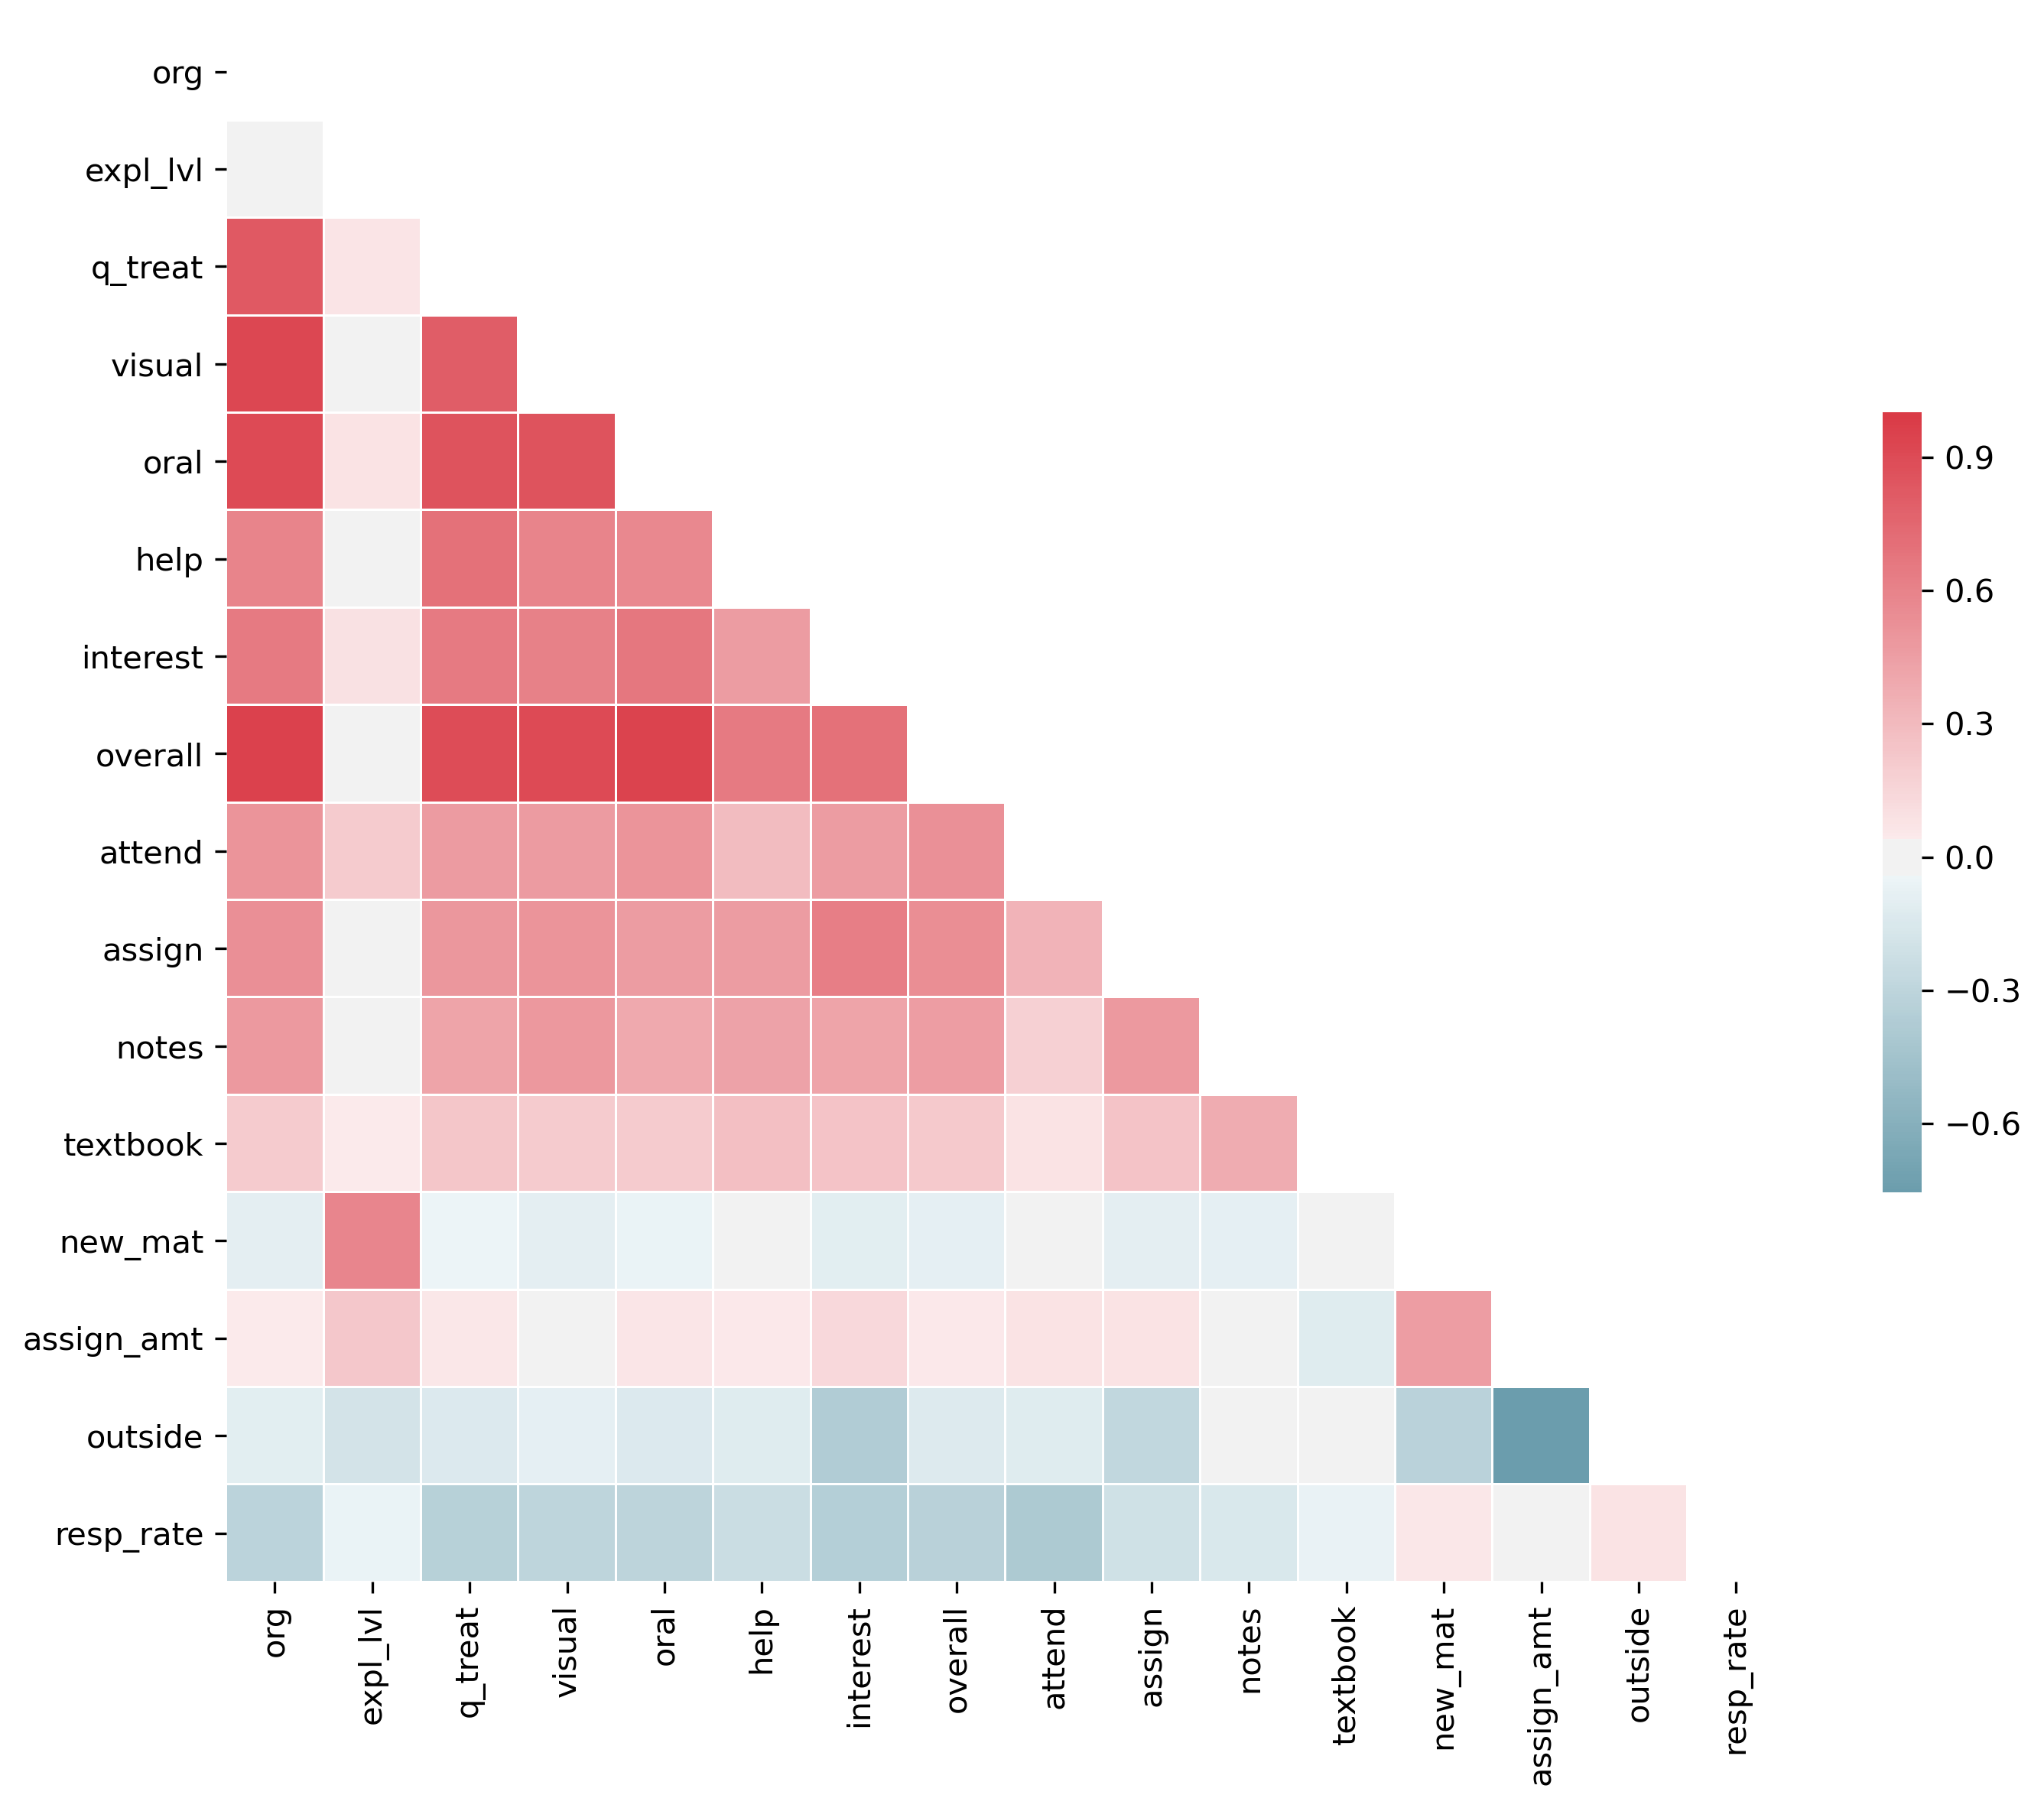

In [26]:
df1cor=df1.drop(["term","section","num_resp","enrolled","salary","title"],1).corr()

mask = np.zeros_like(df1cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df1cor,mask=mask,square=True,cmap=cmap,linewidths=.5,center=0,cbar_kws={"shrink": .5})

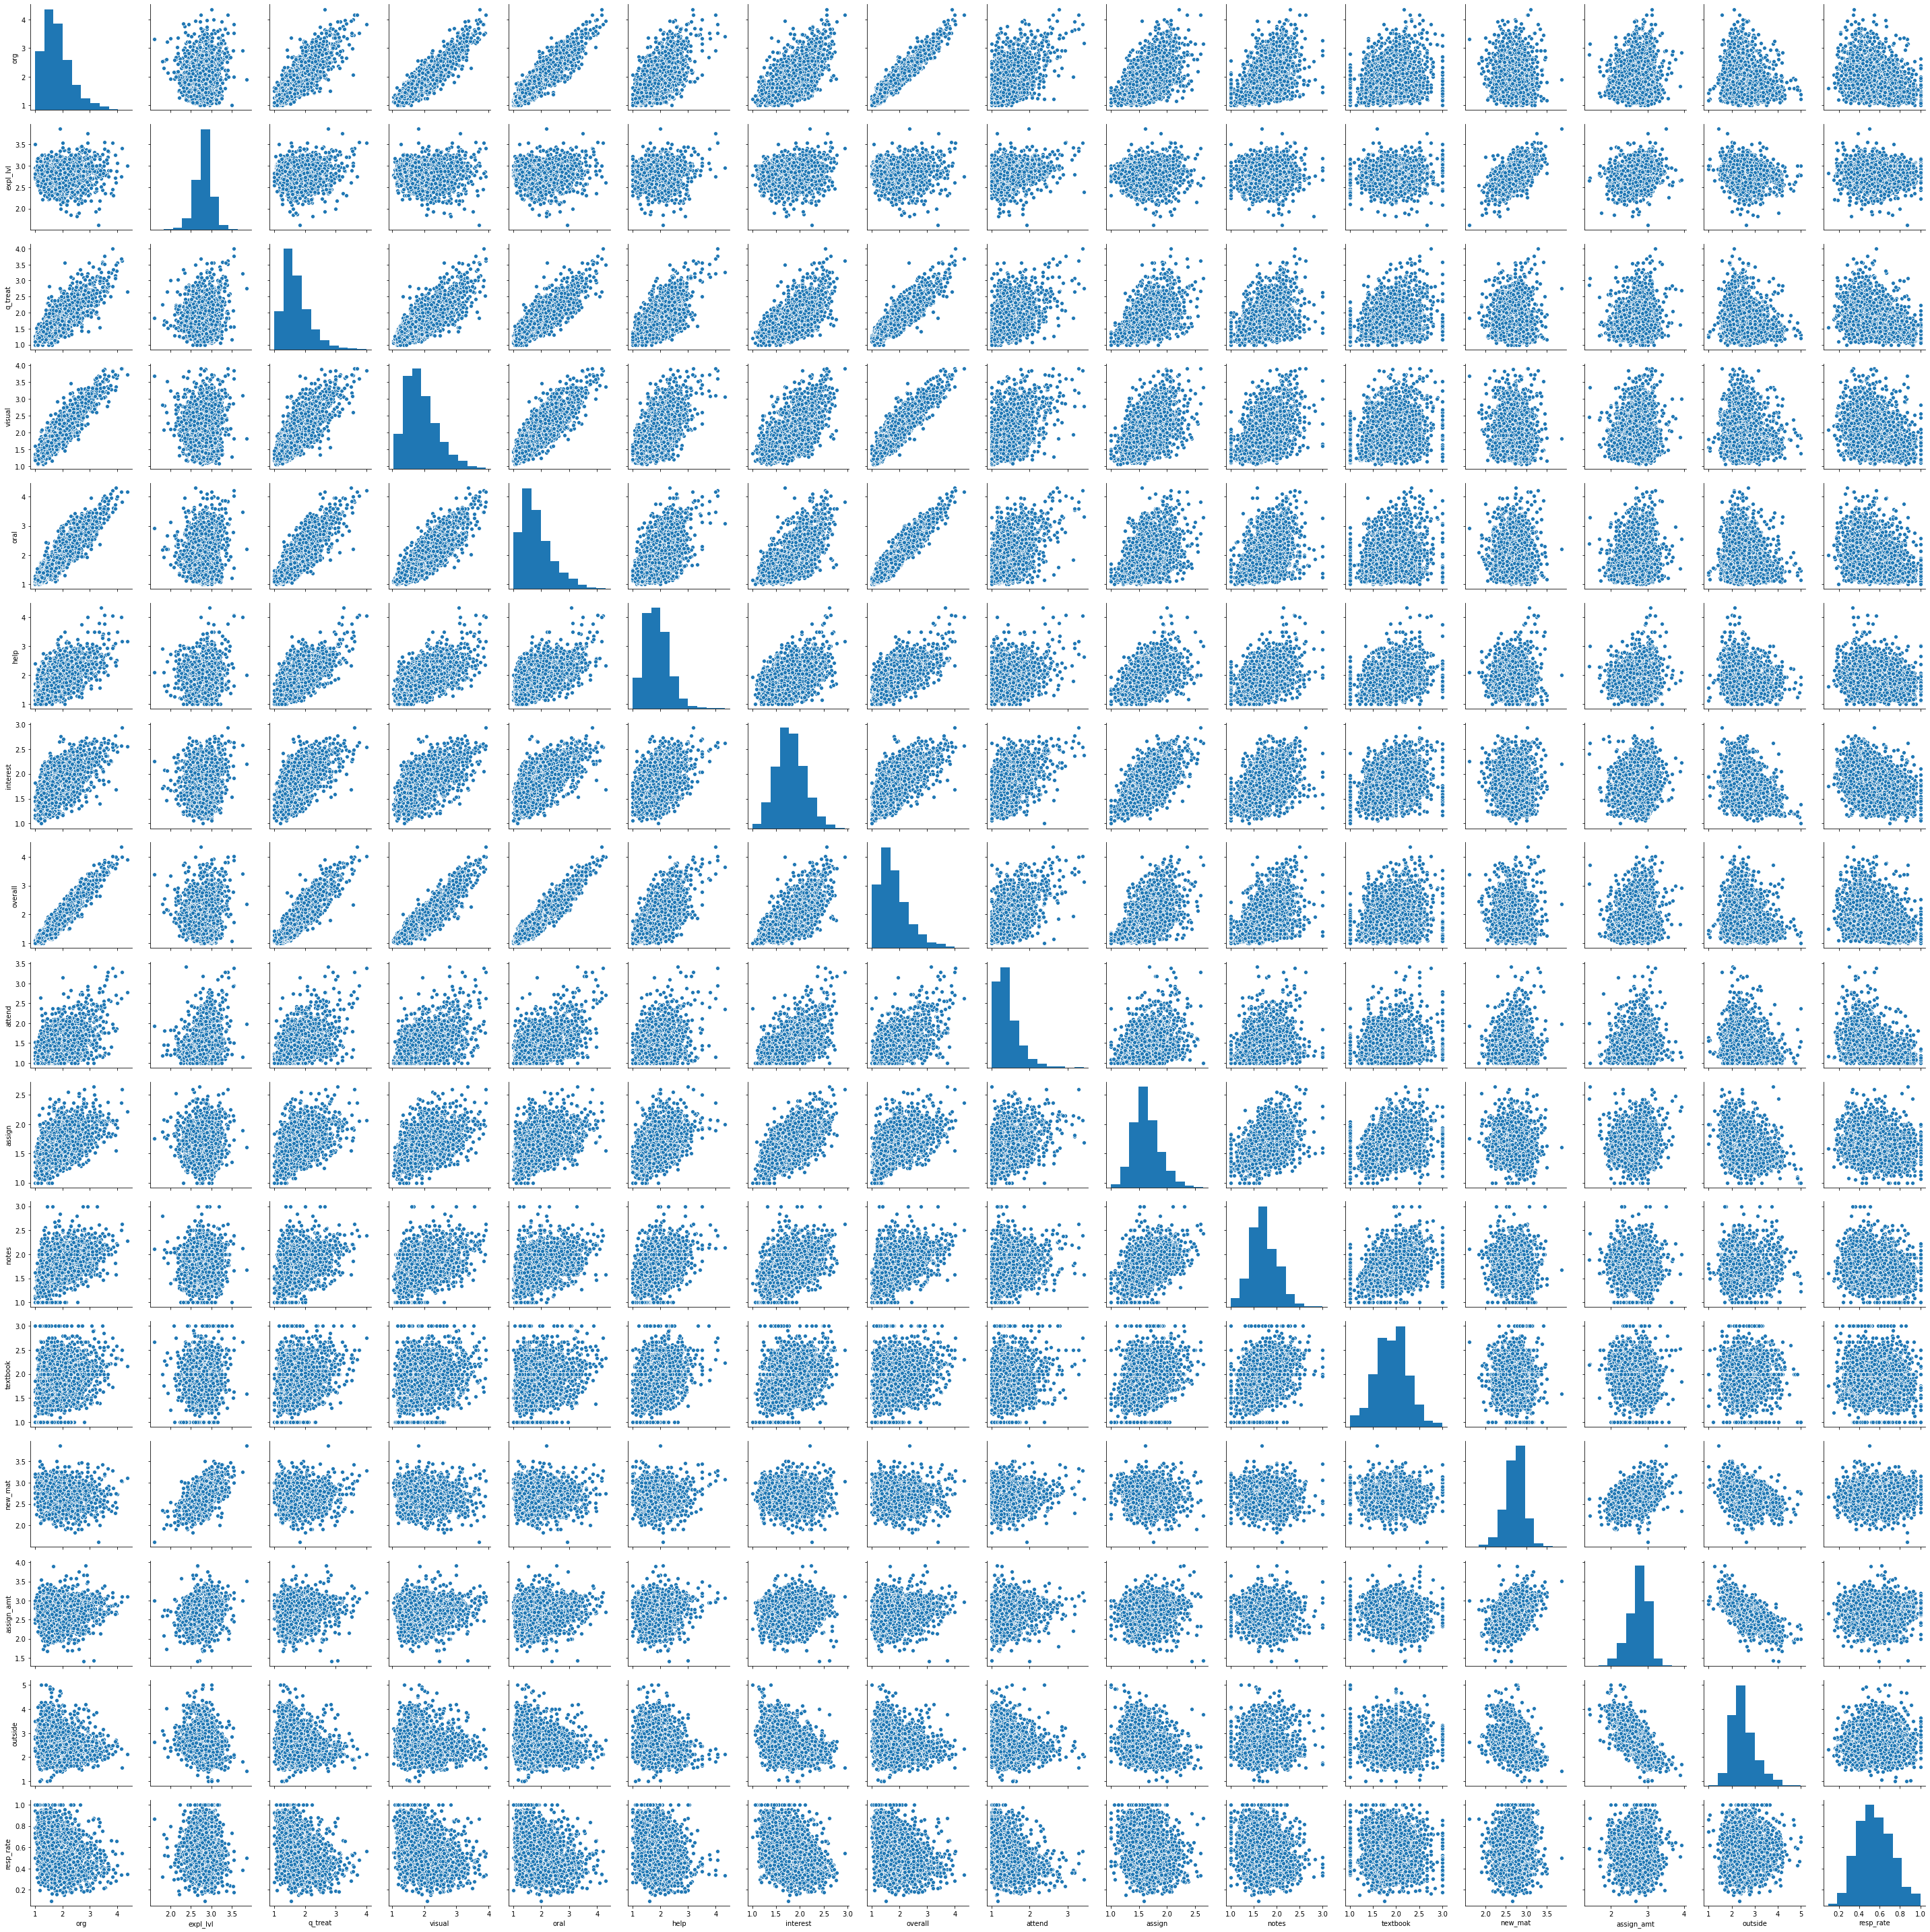

In [11]:
sns.pairplot(df1.drop(["term","section","num_resp","enrolled",],1)); # lol unreadable

In [305]:
df1["dept"]=df1.ccode.apply(lambda x:x.split(" ",1)[0])

In [306]:
df1.dept.value_counts()

CS        1247
MATH       696
STAT       436
ACTSC      200
AMATH      169
CO         158
PMATH       91
COMM        42
CM          27
MATBUS      24
MTHEL       14
SE          13
ACC          3
Name: dept, dtype: int64

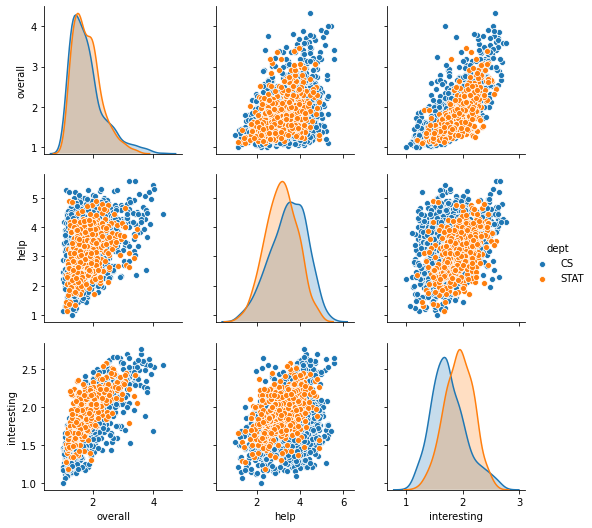

In [307]:
depts=["CS","STAT"]#,"ACTSC","MATH","AMATH","CO","PMATH"]
sns.pairplot(df1[df1.dept.isin(depts)],
             vars=["overall","help","interesting"],hue="dept");

In [28]:
sal=pd.concat([pd.read_csv(f"salaries/p_{yr}.csv") for yr in range(2018,2010,-1)])
sal=sal.groupby("name").first()
sal.head(50)

title     salary  benefits
name                                                           
A. Tupling                       Professor  180567.92    519.72
A.Russell Tupling                Professor  166933.16    578.96
Abigail Scholer        Associate Professor  132597.73    373.00
Achim Kempf                      Professor  187834.44    395.88
Ada Barlatt            Assistant Professor  102159.48    359.08
Ada Hurst                         Lecturer  128921.00    380.48
Adam Kolkiewicz        Associate Professor  175958.20    519.36
Adam Neale                        Lecturer  102058.60    169.28
Adam Tsen              Assistant Professor  128595.20    147.44
Adam Vitalis           Assistant Professor  178572.56    181.60
Adel Sedra                       Professor  183584.56    175.98
Adil Al-Mayah          Associate Professor  139878.18    319.12
Adrian Blackwell       Associate Professor  140825.64    428.60
Adrian Gerlich         Associate Professor  155205.36    433.36
Adrian Lupascu         Associate Professor  146774.36    379.96
Adrienne Gilbert                  Lecturer  117182.04    664.40
Adrienne Lo            Associate Professor  123663.84    154.48
Aimee Morrison         Associate Professor  120316.96    417.40
Aiping Yu              Associate Professor  135405.98    185.08
Ajit Singh             Associate Professor  152691.56    591.16
Ajoy Opal                        Professor  187565.92    581.80
Alain Gamache                     Lecturer  109462.60    164.04
Alain-Desire Nimubona  Associate Professor  141361.48    427.52
Alan Douglas           Associate Professor  259757.20    243.16
Alan Huang             Associate Professor  218708.42    542.28
Alan Macnaughton       Associate Professor  184475.52    392.96
Alan Webb                        Professor  282151.52    596.68
Alastair Craik         Associate Professor  176691.44    521.56
Alejandro Lopez-Ortiz            Professor  184477.28    657.40
Alexander Nelson       Assistant Professor  121879.88    359.60
Alexander Penlidis               Professor  218158.84    617.44
Alexander Schied                 Professor  186146.56    549.56
Alexander Statiev      Associate Professor  119498.04    163.16
Alexander Wong         Associate Professor  170217.76    472.48
Alexandru Nica                   Professor  176320.48    520.44
Alexis Dolphin         Assistant Professor  105472.96    133.28
Alfred Menezes                   Professor  191707.24    262.36
Alfred Yu                        Professor  152582.44    420.60
Ali Elkamel                      Professor  176689.08    563.88
Ali Ghodsi Boushehri             Professor  148968.20    439.56
Ali Mashtizadeh        Assistant Professor  152140.24    167.16
Alice Kuzniar                    Professor  209921.44    265.56
Alicja Muszynski       Associate Professor  154634.84    427.52
Allan Cameron                    Professor  107929.16    523.40
Allison Kelly          Assistant Professor  121780.68    333.16
Allyson Giannikouris              Lecturer  107565.72    317.28
Altay Coskun           Associate Professor  146422.16    432.08
Amelia Clarke          Associate Professor  156323.28    443.60
Amer Obeidi                       Lecturer  104035.40      0.00
Amir Khajepour                   Professor  232812.52    588.36

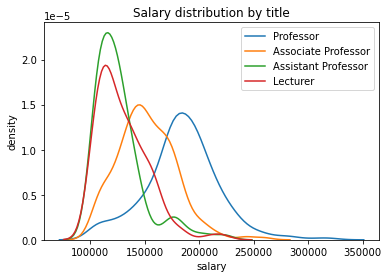

In [332]:
for tit in sal.title.unique():
    sns.kdeplot(sal[sal.title==tit].salary,label=tit)
plt.legend();

plt.xlabel('salary')
plt.ylabel('density')
plt.title('Salary distribution by title');
# plt.savefig("sal_dist.png")

In [29]:
sal.loc["David Jao"]

title       Professor
salary         141649
benefits       447.56
Name: David Jao, dtype: object

In [30]:
sal.sort_values("salary",ascending=False).head(10)

title     salary  benefits
name                                            
Raymond Laflamme  Professor  322455.36    780.76
Thomas Scott      Professor  316407.53    627.64
Ken Tan           Professor  310591.52    234.76
David Cory        Professor  298323.32    314.20
George Dixon      Professor  285000.06   3600.00
Kenneth Klassen   Professor  283675.32    611.56
Alan Webb         Professor  282151.52    596.68
Sushanta Mitra    Professor  279093.18    514.64
David Edwards     Professor  274601.76    332.16
Lyndon Jones      Professor  269662.20    609.96

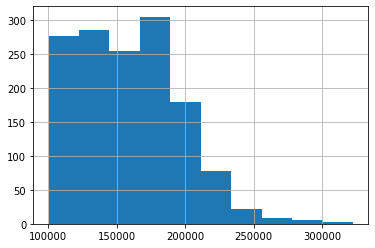

In [298]:
sal.salary.hist();

In [289]:
sal.title.value_counts()

Professor              589
Associate Professor    464
Assistant Professor    195
Lecturer               171
Name: title, dtype: int64

In [302]:
df11=df1.groupby("instructor")[["overall"]].mean().sort_values(ascending=True,by="overall").reset_index()

salj=pd.merge(df11,sal,how='left', left_on=["instructor"],right_on=['name'])
salj[salj.isna().any(axis=1)]#[0:50]

instructor   overall title  salary  benefits
1         Ryan Trelford  1.142239   NaN     NaN       NaN
9       Jordan Hamilton  1.211254   NaN     NaN       NaN
24         Blake Madill  1.297009   NaN     NaN       NaN
26               Xi Gao  1.300078   NaN     NaN       NaN
33   Michelle Ashburner  1.322350   NaN     NaN       NaN
..                  ...       ...   ...     ...       ...
344        Maite Dupuis  3.017096   NaN     NaN       NaN
345       Ahmad Alrefai  3.225774   NaN     NaN       NaN
347   Daniela Maftuleac  3.326026   NaN     NaN       NaN
348        Steven Gindi  3.395768   NaN     NaN       NaN
351       Iakov Nekrich  3.560606   NaN     NaN       NaN

[128 rows x 5 columns]